In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

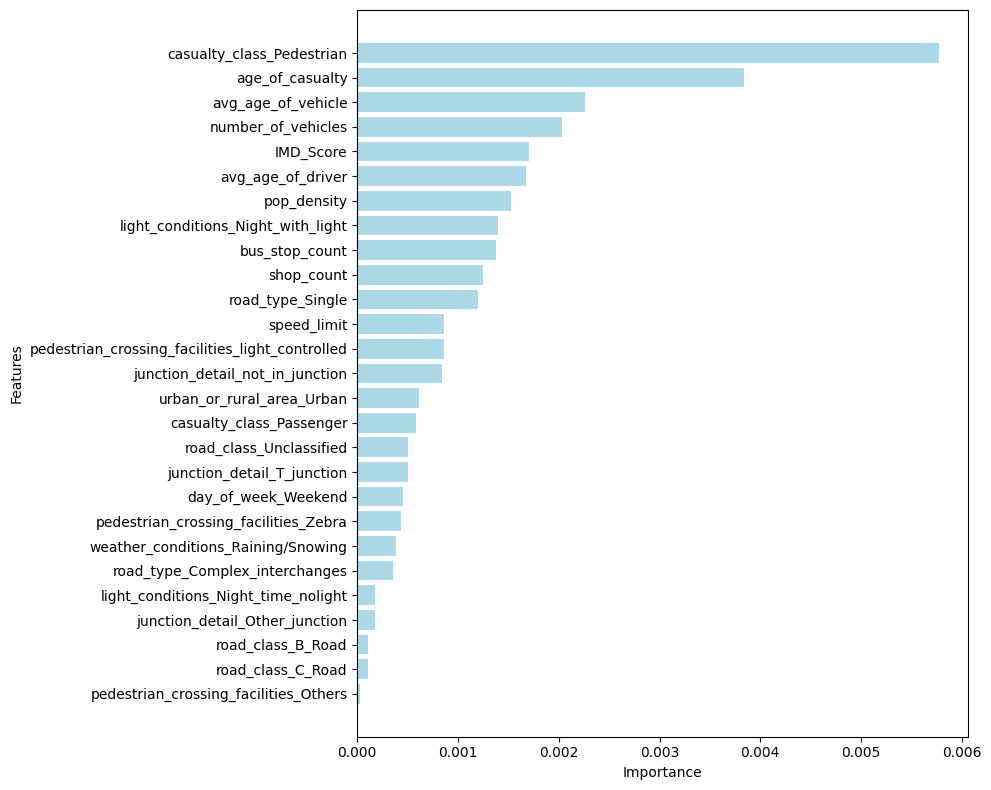

In [3]:

# 特征重要性数据
importance_data = {
    "casualty_class_Pedestrian": 0.005768742058449794,
    "age_of_casualty": 0.003837357052096535,
    "avg_age_of_vehicle": 0.002261753494282037,
    "number_of_vehicles": 0.0020330368487928574,
    "IMD_Score": 0.0017026683608640791,
    "avg_age_of_driver": 0.0016772554002540963,
    "pop_density": 0.001524777636594643,
    "light_conditions_Night_time_light": 0.0013977128335450617,
    "bus_stop_count": 0.0013722998729351898,
    "shops_count": 0.0012452350698856085,
    "road_type_Single": 0.0011944091486658648,
    "speed_limit": 0.0008640406607369755,
    "pedestrian_crossing_facilities_light_controlled": 0.0008640406607369755,
    "junction_detail_not_in_junction": 0.0008386277001271036,
    "urban_or_rural_area_Urban": 0.0006099110546378128,
    "casualty_class_Passenger": 0.000584498094027941,
    "first_road_class_Unclassified": 0.0005082592121982143,
    "junction_detail_T_junction": 0.0005082592121982143,
    "day_of_week_Weekend": 0.0004574332909783596,
    "pedestrian_crossing_physical_facilities_Zebra": 0.00043202033036848775,
    "weather_conditions_Raining/Snowing": 0.000381194409148633,
    "road_type_Other": 0.00035578144853876115,
    "light_conditions_Night_time_nolight": 0.00017789072426932506,
    "junction_detail_Other_junction": 0.00017789072426932506,
    "first_road_class_B": 0.00010165184243959846,
    "first_road_class_C": 0.00010165184243959846,
    "pedestrian_crossing_physical_facilities_Others": 2.541296060987186e-05,
    "weather_conditions_Fog": 0.0,
    "first_road_class_Motorway": -2.541296060987186e-05,
    "distance_5_10km": -5.082592121985474e-05,
    "distance_5km": -0.00012706480304958134,
    "junction_detail_Roundabout": -0.00012706480304958134,
    "distance_20km": -0.00017789072426932506
}

# 定义新的名称映射
name_mapping = {
    'Index of Multiple Deprivation (IMD) Score': 'IMD_score',
    'light_conditions_Night_time_light': 'light_conditions_Night_with_light',
    'shops_count': 'shop_count',
    'pedestrian_crossing_physical_facilities_pedestrian_light_controlled': 'pedestrian_crossing_facilities_light_controlled',
    'pedestrian_crossing_physical_facilities_Zebra': 'pedestrian_crossing_facilities_Zebra',
    'pedestrian_crossing_physical_facilities_Others': 'pedestrian_crossing_facilities_Others',
    'first_road_class_C': 'road_class_C_Road',
    'first_road_class_B': 'road_class_B_Road',
    'first_road_class_Unclassified': 'road_class_Unclassified',
    'road_type_Other': 'road_type_Complex_interchanges'
}


# 使用新的名称更新字典
updated_importance_data = {name_mapping.get(key, key): value for key, value in importance_data.items()}

# 筛选重要程度大于 0 的特征
filtered_importance = {feature: importance for feature, importance in updated_importance_data.items() if importance > 0}

# 绘图
plt.figure(figsize=(10, 8))
plt.barh(list(filtered_importance.keys()), list(filtered_importance.values()), color='lightblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()  # 颠倒y轴，让最重要的特征在图的顶部

# 调整图形布局以防止内容被裁剪
plt.tight_layout()

# 保存图表
plt.savefig('Output/feature_importance.png')

plt.show()

In [5]:
# Define the confusion matrices

cm_logistic_regression = np.array([[20097,9903],[12752,17248]])
cm_xgboost = np.array([[23168, 6832],[11808,18192]])

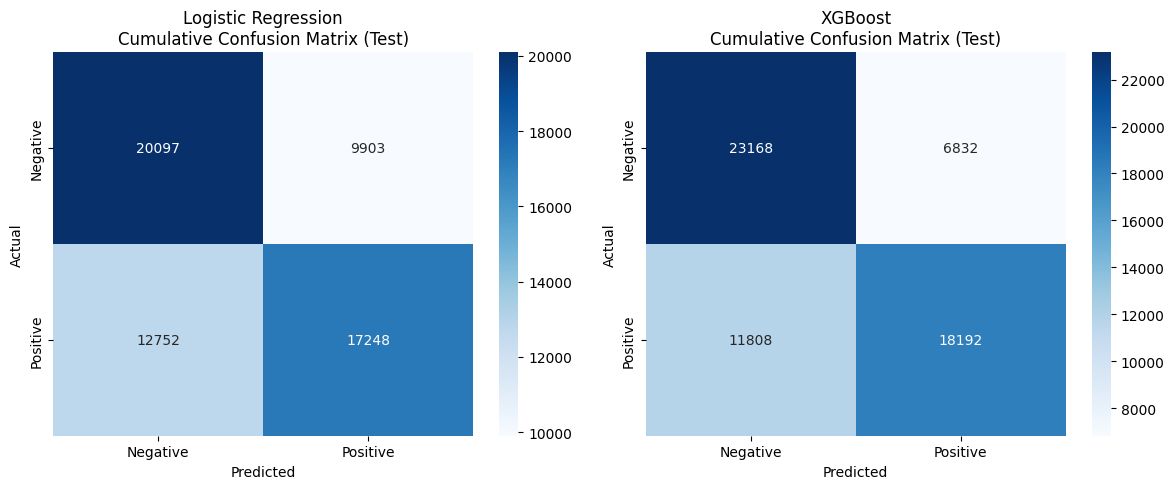

In [6]:
# Redefine the plot to include color bars this time

# Set up the figure again
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Logistic Regression Confusion Matrix with color bar
sns.heatmap(cm_logistic_regression, annot=True, fmt='d', cmap='Blues', ax=ax[0], cbar=True)
ax[0].set_title('Logistic Regression\nCumulative Confusion Matrix (Test)')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
ax[0].set_xticklabels(['Negative', 'Positive'])
ax[0].set_yticklabels(['Negative', 'Positive'])

# XGBoost Confusion Matrix with color bar
sns.heatmap(cm_xgboost, annot=True, fmt='d', cmap='Blues', ax=ax[1], cbar=True)
ax[1].set_title('XGBoost\nCumulative Confusion Matrix (Test)')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
ax[1].set_xticklabels(['Negative', 'Positive'])
ax[1].set_yticklabels(['Negative', 'Positive'])

# Display the plots with color bars
plt.tight_layout()
plt.show()


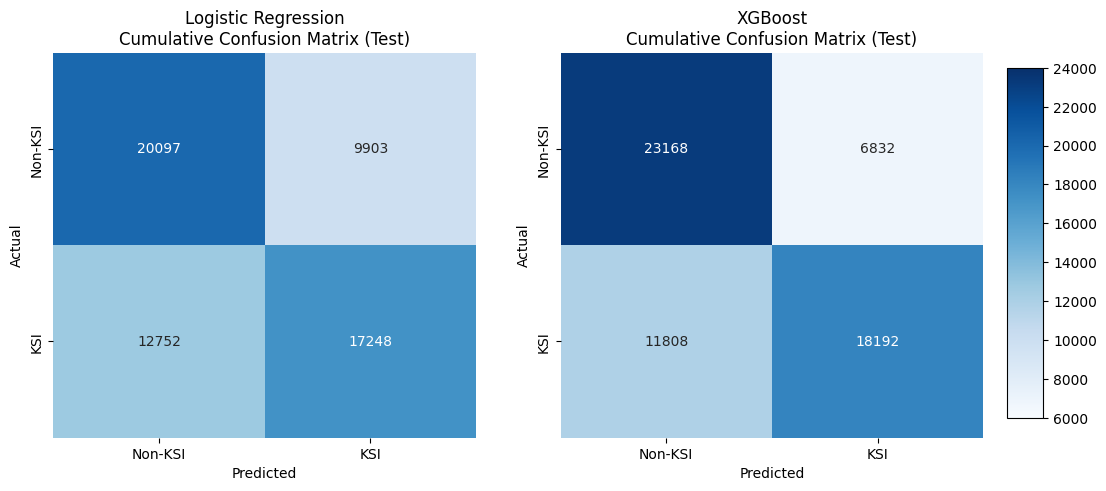

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

vmin = 6000
vmax = 24000

# Set up the figure
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Create the color bar position, ensuring it is not clipped
cbar_ax = fig.add_axes([0.92, 0.15, 0.03, 0.7])

# Logistic Regression confusion matrix
sns.heatmap(cm_logistic_regression, annot=True, fmt='d', cmap='Blues', ax=ax[0], cbar=False, vmin=vmin, vmax=vmax)
ax[0].set_title('Logistic Regression\nCumulative Confusion Matrix (Test)')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
ax[0].set_xticklabels(['Non-KSI', 'KSI'])
ax[0].set_yticklabels(['Non-KSI', 'KSI'])

# XGBoost confusion matrix
sns.heatmap(cm_xgboost, annot=True, fmt='d', cmap='Blues', ax=ax[1], cbar=False, vmin=vmin, vmax=vmax)
ax[1].set_title('XGBoost\nCumulative Confusion Matrix (Test)')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
ax[1].set_xticklabels(['Non-KSI', 'KSI'])
ax[1].set_yticklabels(['Non-KSI', 'KSI'])

# Draw the color bar
fig.colorbar(ax[1].collections[0], cax=cbar_ax)

# Adjust the subplot layout to fit the color bar
fig.subplots_adjust(right=0.9)

# Save the figure
plt.savefig('Output/Confusion_Matrix.png', bbox_inches='tight')

# Display the figure
plt.show()
